In [ ]:
#######################
# CONFIG ZONE
#######################

# Importing Libs
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from collections import Counter
import numpy as np

# My Tools
import milanesas.eda_helper as eh
from tools.helpers import (
    get_column_uniques,
    get_column_uniques_count,
    plot_grouped_by_category_barh_charts,
    barh_chart_unique_values,
    print_unique_normalized_values_by_group,
    make_vertical_grouped_chart,
    make_horizontal_grouped_chart,
    barh_chart_count,
    md_table,
    md_group_table,
)


%matplotlib inline

# Reseting figure size params.
plt.rcParams["figure.figsize"] = [12, 7]
# Setting seaborn as default plotting lib.
sns.set()
sns.set_palette("pastel")

In [1]:
df = pd.read_csv("../data/data_fixed.csv")

In [2]:
df = df.drop("Unnamed: 0", axis=1)

# **Demographics**
   - Género
   - Edad actual


### Gender

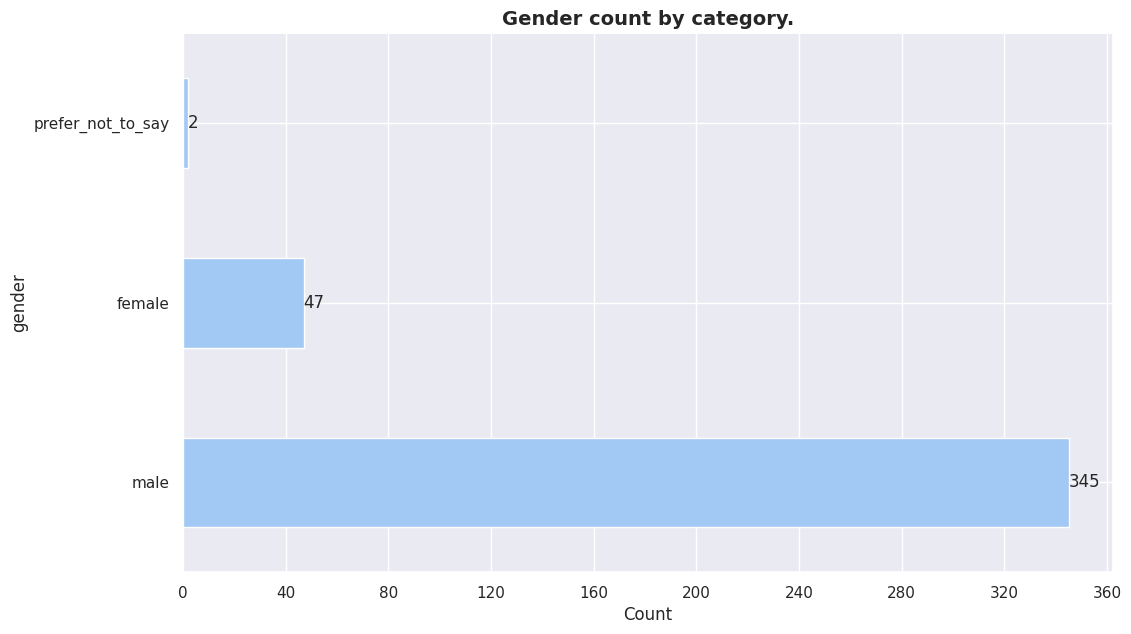

In [3]:
barh_chart_count(df, "gender", "Gender count by category.", "Count")

[op] en materia de genro se encontraron 3 categorias:

+ *male* 

+ *female*

+ *prefer not to say*

Menos de 50% de los encuestados no pertenece al 'sexo masculino'. Las 2 minorias existentes no logran sumar el 25% de las repuestas totales.

### Current age.

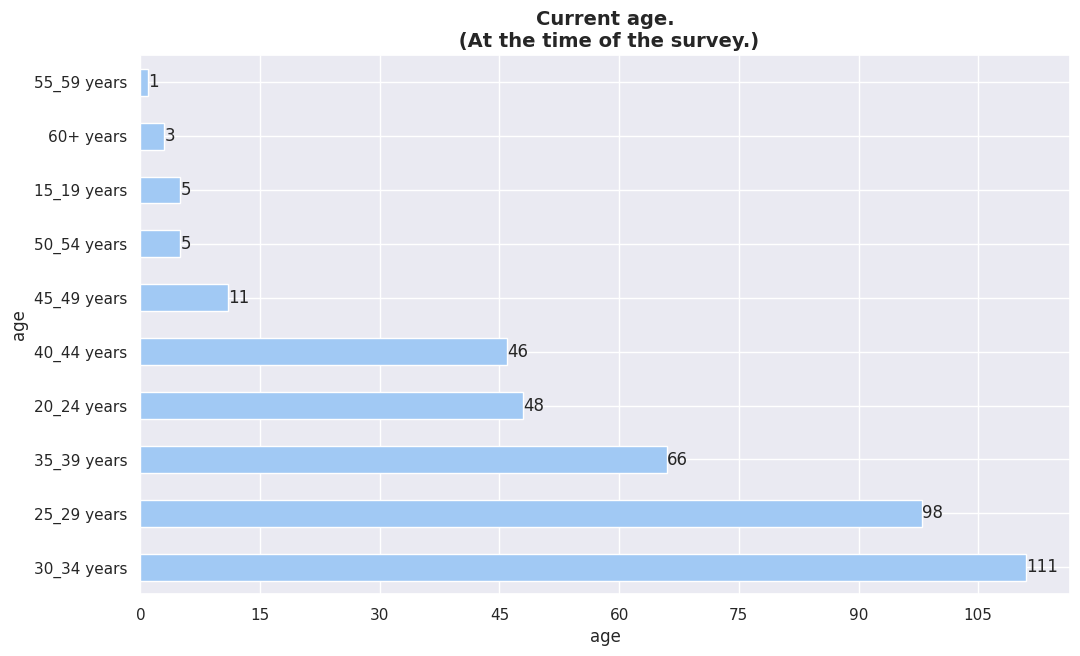

In [4]:
barh_chart_count(df, "age", "Current age.\n (At the time of the survey.)", "age")

[op] Los grupos mas concentrados de encuestados tienen mas de **35 años** mientras que la los grupos de menor edad, en todas las categorias, no alcanzan a sobrepasar el 50%. 
La mayor concentracion de encuestados esta en el grupo etario de **30-34** años. El grupo etarios de encuestados que concentra la mayor cantidad de encuestados comienza en los 30 años y termina el los 39 años.

# Ages by gender.

In [5]:
gender_groups = df.groupby("gender")
print(gender_groups.groups.keys())

dict_keys(['female', 'male', 'prefer_not_to_say'])


In [6]:
group_config = {
    "title": "Current age by Gender",
    "c1_label": "Male",
    "c2_label": "Female",
    "xlabel": "Count",
    "ylabel": "Current Age",
}

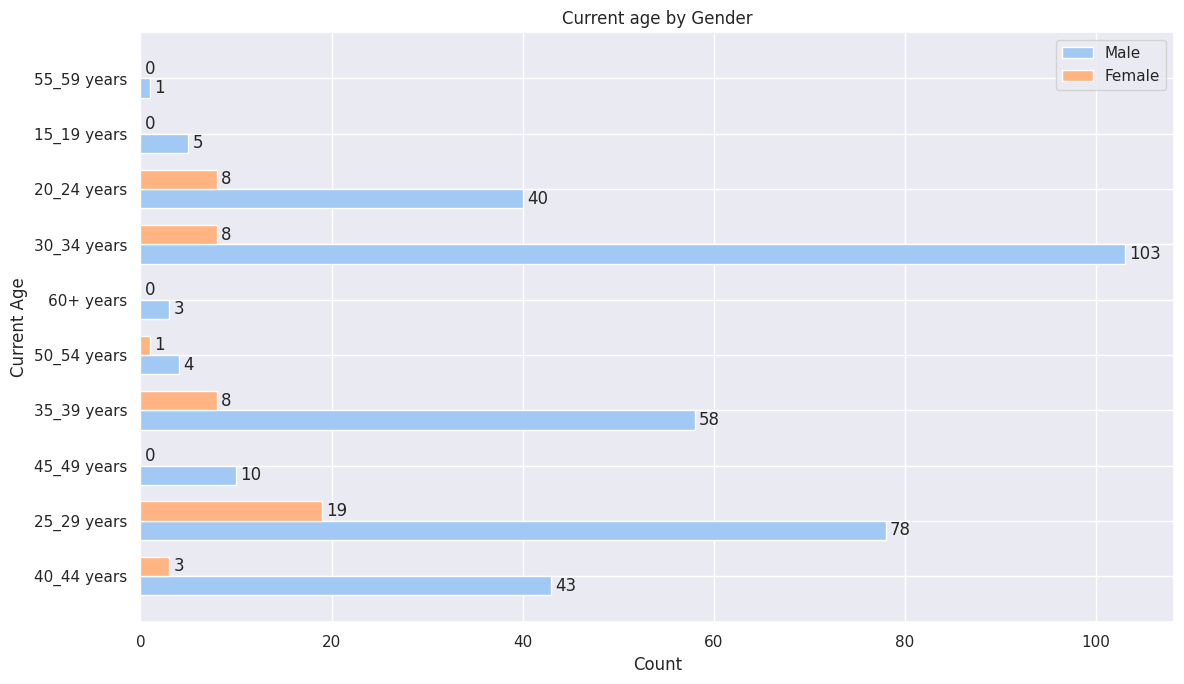

In [8]:
make_horizontal_grouped_chart(
    df,
    gender_groups.get_group("male"),
    gender_groups.get_group("female"),
    "age",
    get_column_uniques(df, "age"),
    group_config,
)

[op] En el caso de la comparacion de distribuciones etarias por genero. Cuando se comparan genero masculino y femenino. Se observan que en la mayoria de las categorias etarias, en ningun caso, existe una distribucion "igualitaria" de representacion de generos. En todos los casos la representacion "masculina" supera amplamente a la femenina. (No se tomo en consideracion la categoria "prefiero no contestar debido que no es una categoria representativa.)

Las 4 categorias con mayor reprecentacion som:

* 20-24
* 25-29
* 30-34
* 35-39

En ninguno de los casos anteriores el % de mujeres supera el 50% del total de la categoria.

In [9]:
#'label', 'df', 'group_column', 'value_column', and 'title'
md_group_table(
    "gender_count_by_ages_table", df, "gender", "age", "Gender total counts by age."
)


<center>
    <a id="gender_count_by_ages_table_SBxTr"></a>
    <br/>
    <br/>
    <div style="text-align: center;">
    | Category | Percentage |
|-------|-------------|
    | 30_34 years | 29% |
| 25_29 years | 22% |
| 35_39 years | 16% |
| 40_44 years | 12% |
| 20_24 years | 11% |
| 45_49 years | 2% |
| 15_19 years | 1% |
| 50_54 years | 1% |
| 60+ years | 0% |
| 55_59 years | 0% |
    </div>
    <br/>
    <p style="text-align: center;"><em>Gender total counts by age. 
 <p class="table_subtitle">(male)<p></em></p>
    <br/>
</center>






<center>
    <a id="gender_count_by_ages_table_Rfhk1"></a>
    <br/>
    <br/>
    <div style="text-align: center;">
    | Category | Percentage |
|-------|-------------|
    | 25_29 years | 40% |
| 35_39 years | 17% |
| 30_34 years | 17% |
| 20_24 years | 17% |
| 40_44 years | 6% |
| 50_54 years | 2% |
    </div>
    <br/>
    <p style="text-align: center;"><em>Gender total counts by age. 
 <p class="table_subtitle">(female)<p></em></p>
    <br/

## Gender By Majors

#'label', 'df', 'group_column', 'value_column', and 'title'
md_group_table(
    'gender_count_by_majors_table',
    df,
    'majors',
    'gender',
    
    'Gender total counts by majors.'
)

In [11]:
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

In [13]:
#'label', 'df', 'group_column', 'value_column', and 'title'
md_group_table(
    "gender_count_by_ages_table", df, "gender", "majors", "generos por majors..?"
)


<center>
    <a id="gender_count_by_ages_table_PKWpj"></a>
    <br/>
    <br/>
    <div style="text-align: center;">
    | Category | Percentage |
|-------|-------------|
    | computer_engineering | 28% |
| systems_analysis | 20% |
| programming, systems_analysis | 10% |
| programming, systems_analysis, computer_engineering | 7% |
| programming, computer_engineering | 6% |
| systems_analysis, computer_engineering | 4% |
| none | 2% |
| programming | 2% |
| electronic_engineering | 2% |
| computer_engineering, other | 2% |
| programming, other | 1% |
| programming, systems_analysis, other | 1% |
| programming, systems_analysis, mathematics | 0% |
| other | 0% |
| systems_analysis, computer_engineering, other | 0% |
| other ingenerías | 0% |
| programming, systems_analysis, graphic_design | 0% |
| programming, systems_analysis, computer_engineering, mathematics | 0% |
| programming, computer_engineering, other | 0% |
| programming, systems_analysis, computer_engineering, graphic_design